# target noise

adding target noise makes it more difficult to find a ground truth solution, and potentially more realistic. 

but how much noise is realistic for these datasets, and how much does it bound the performance of a perfect model?

In [85]:
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import r2_score

results = []

for dataset in (glob('/home/bill/projects/pmlb/datasets/feynman*/*.tsv.gz')
                +glob('/home/bill/projects/pmlb/datasets/strogatz*/*.tsv.gz')):
    df = pd.read_csv(dataset, sep='\t',compression='gzip')
    y = df['target']
#     print('dataset:',dataset) 
#     for noise in np.logspace(-6,2,9): 
    for noise in [0.001, 0.01]:
#         print('noise level:',noise)
        y_rms=np.linalg.norm(y)/len(y)
#         print('y rms:', y_rms)
        mu = np.random.normal(0,
#                               noise*np.linalg.norm(y)/len(y), 
                              noise*np.linalg.norm(y), 
                              size=len(y))
        yn = y + mu
#         print('r2_score:',r2_score(y, yn))
        results.append(dict(
                       dataset=dataset.split('/')[-1][:-7],
                       noise=noise,
                       y=y.tolist(),
                       yn=yn.tolist(),
                       mu=mu,
                       y_rms=y_rms,
                       r2=r2_score(y, yn),
                       group = 'strogatz' if 'strogatz' in dataset else 'feynman'
                       ))
df = pd.DataFrame.from_records(results, columns=results[0].keys()) 
                             
                             


In [80]:
df = pd.read_csv('/home/bill/projects/pmlb/datasets/strogatz_bacres1/strogatz_bacres1.tsv.gz', sep='\t')
len(df)

400

In [77]:
pd.set_option('display.max_rows', 580)
df.groupby(['dataset','noise'])['r2'].median().rename('r2_median')
# df_std = df.groupby(['dataset','noise'])['r2'].std().rename('r2_std').round(3)
# pd.concat([df_med, df_std],axis=1)

dataset            noise     
feynman_III_10_19  0.000001       1.000000
                   0.000010       1.000000
                   0.000100       1.000000
                   0.001000       1.000000
                   0.010000       1.000000
                                   ...    
strogatz_vdp2      0.010000       1.000000
                   0.100000       0.999969
                   1.000000       0.996634
                   10.000000      0.660413
                   100.000000   -34.147346
Name: r2_median, Length: 1170, dtype: float64

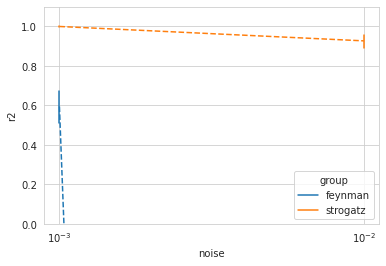

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
ax =sns.lineplot(data = df,
             x='noise',
             y='r2',
             hue='group',
#              legend=False,
            err_style='bars',
            linestyle='--'
            )
ax.set_xscale('log')

plt.ylim([0,1.1])
# ax.set_yscale('log')
# plt.xticks(np.logspace(-6,-2,5))
plt.grid(True,axis='y',which='minor')

TypeError: unhashable type: 'list'

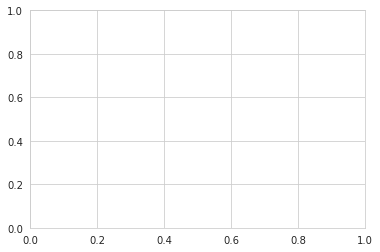

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
ax =sns.scatterplot(data = df,
             x='y',
             y='yn',
             hue='noise',
             legend=False
            )
ax.set_square()
# ax.set_xscale('log')

# plt.ylim([0,1.1])
# ax.set_yscale('log')
# plt.xticks(np.logspace(-6,-2,5))
# plt.grid(True,axis='y',which='minor')